In [ ]:
#step1: download ob zip file then extract it you will have 1 notebook and 2 html and one image then open notebook in colab
#step2: create 1st folder named templates in colab and add about.html and index.html which is extracted from zip
#step3: create 2nd folder named static in cold and add back.jpg which is extracted from zip
#step4: run all the code sequentially one cell after another
#step5: go to  "2ND LAST CELL"  and click on ngrok-free.app link where the webapp running which will be appear once that cell run
#step6: make sure the last cell runs continuously till you finish all operations in web.
#step7:Don't click on local host address present in last cell as i mentioned the web will in ngrok-free.app "2ND LAST CELL"

In [ ]:
!pip install pyngrok # to install grok so that we can run as local host
!git clone https://github.com/tensorflow/models.git #clone models of tensorflow zoo
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=.
!cd models/research && \
    cp object_detection/packages/tf2/setup.py . && \
    python -m pip install .
#above represents code for getting required files and utilities

fatal: destination path 'models' already exists and is not an empty directory.
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1697356 sha256=8c300ff8d0cde0cf63fd2961a4c6dafeac29a2987355570d1da0a51016eb2752
  Stored in directory: /tmp/pip-ephem-wheel-cache-pzeki8cc/wheels/53/dd/70/2de274d6c443c69d367bd6a5606f95e5a6df61aacf1435ec0d
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [ ]:
#all other packages used

import os
import pathlib
import tensorflow as tf

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from flask import Flask,render_template,request,send_file

import io
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

%matplotlib inline

In [ ]:
url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz'
# to get pretrained model of ssd
PATH_TO_MODEL_DIR = tf.keras.utils.get_file(
    fname='ssd_resnet101_v1_fpn_640x640_coco17_tpu-8',
    origin=url,
    untar=True)

url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt'
# to get labels like name of class
PATH_TO_LABELS = tf.keras.utils.get_file(
    fname='mscoco_label_map.pbtxt',
    origin=url,
    untar=False)


In [ ]:
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"


detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)# load the model that was saved in last step


print('finished loading')

category_index = label_map_util.create_category_index_from_labelmap(
    PATH_TO_LABELS,
    use_display_name=True)

Loading model...Done! Took 40.10144090652466 seconds


In [ ]:
def load_image_into_numpy_array(path):#fuction to convet image to array
  return np.array(Image.open(path))

In [53]:
def detect_objects(image_path):
    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    #  input needs to be a tensor so convert fun used
    input_tensor = tf.convert_to_tensor(image_np)

    # model expects a batch of images so adding axis with tf.newaxis
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detect_fn(input_tensor)
    #print(detections)

    #all outputs are batches tensors.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    #detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    #show classes
    unique_classes = set(detections['detection_classes'])
    print("Classes found:")
    for c in unique_classes:
        print(category_index[c]['name'])

    #counts of different objects
    object_counts = {}
    for class_id in detections['detection_classes']:
        class_name = category_index[class_id]['name']
        if class_name in object_counts:
            object_counts[class_name] += 1
        else:
            object_counts[class_name] = 1


    image_np_with_detections = image_np.copy()
    #visualizing code to make annotation in original input image
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure(figsize=(15, 10))
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()
    return object_counts,detections, image_np_with_detections

In [94]:
#get public url to access the flask app
from pyngrok import ngrok
ngrok.set_auth_token("2e5Z9d13VKJdB1bat0oliqo80h0_3AAq74kngeM4BgreqfqFk")#ngrok auth key

url = ngrok.connect(5000).public_url
print("This is the link for website",url)

print("before clicking above link run next cell make sure it runs continuously")


This is the link for website https://db84-34-91-24-27.ngrok-free.app
before clicking above link run next cell make sure it runs continuously


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Mar/2024 18:49:42] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Mar/2024 18:49:43] "GET /static/back.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Mar/2024 18:49:44] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Mar/2024 18:49:53] "GET /process HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Mar/2024 18:49:54] "GET /static/back.jpg HTTP/1.1" 304 -


Running inference for static/images/test.jpg... Classes found:
person
car
motorcycle
bus
truck
boat
Done


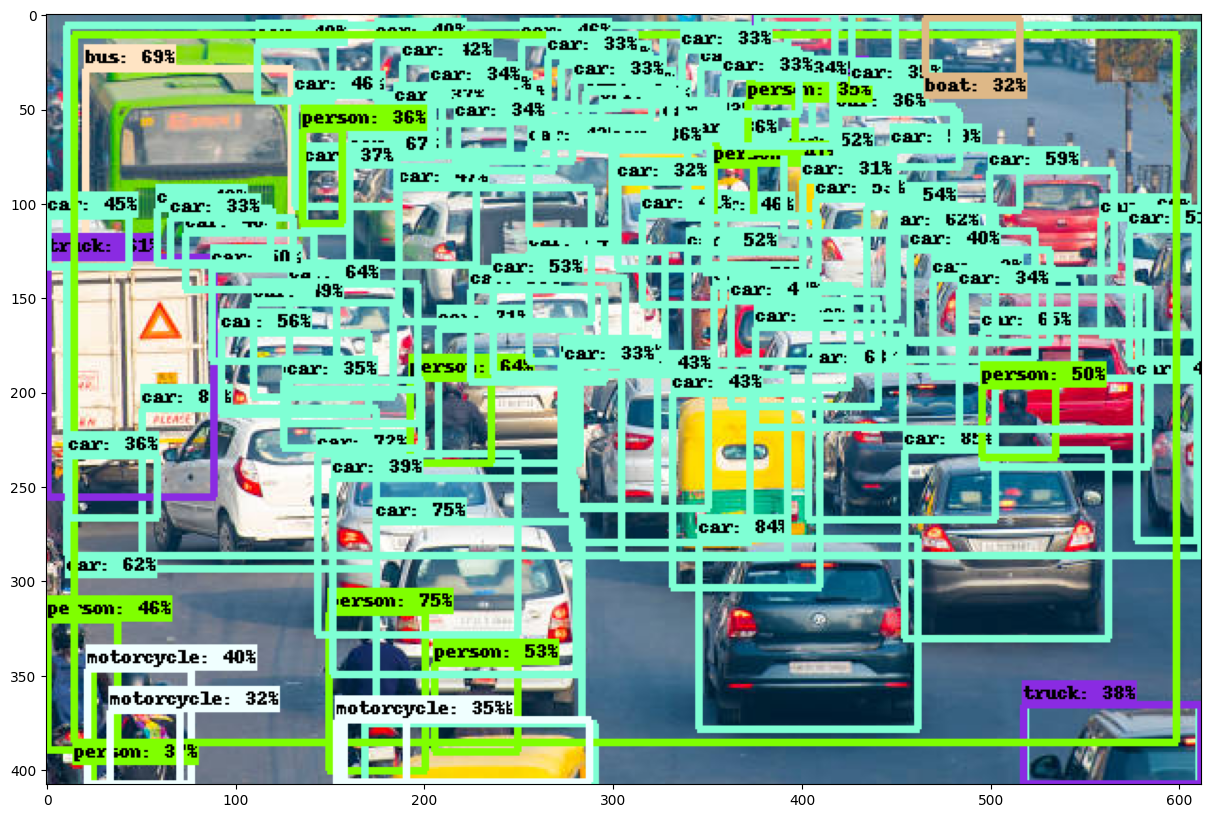

INFO:werkzeug:127.0.0.1 - - [23/Mar/2024 18:50:21] "POST /process HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Mar/2024 18:50:22] "GET /static/back.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [23/Mar/2024 18:50:22] "GET /static/images/output.jpg HTTP/1.1" 200 -


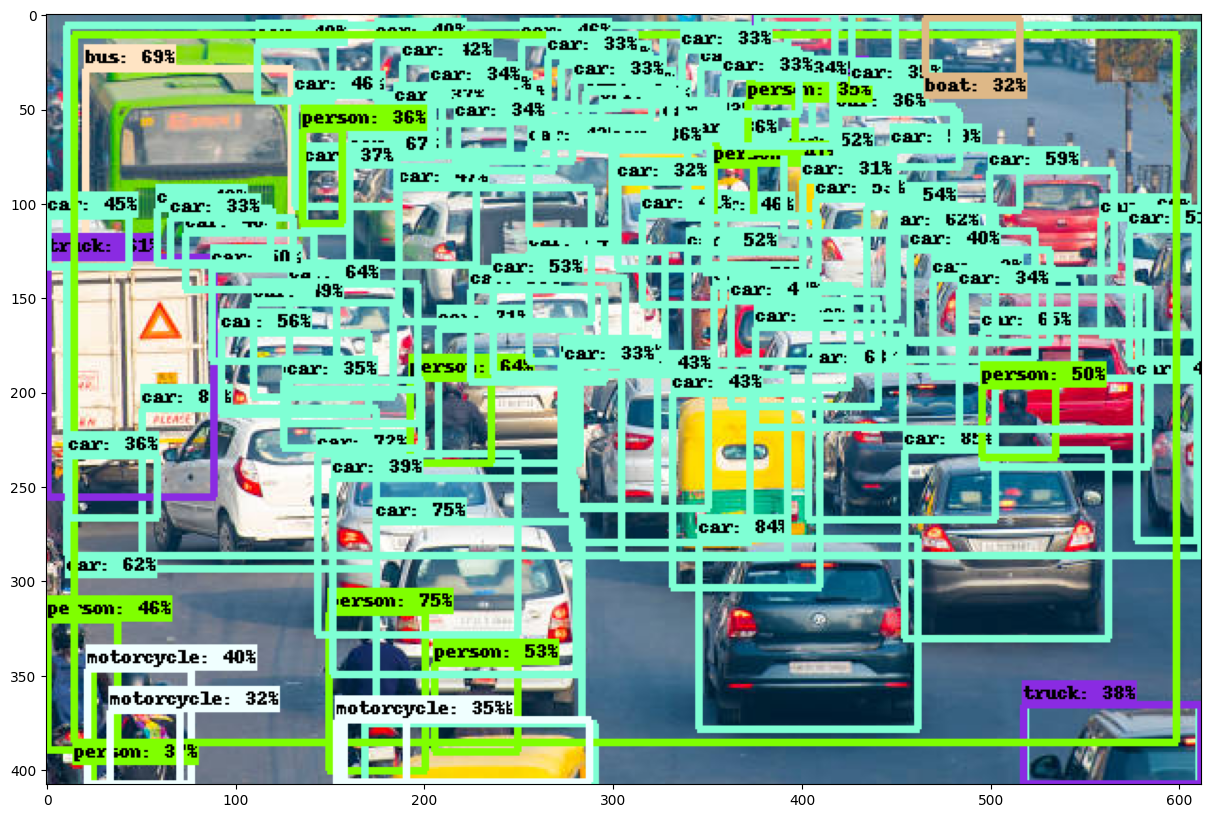

In [95]:
app = Flask(__name__)


@app.route('/')
def home():
  #landing page

  return render_template("about.html")

@app.route("/process",methods=['GET', 'POST'])
def index():
  #input and output viewing page
  if request.method == 'POST':
    test = request.files['image']
    os.makedirs('static/images/', exist_ok=True)
    test.save('static/images/test.jpg')
    output_c,detections, image_np_with_detections = detect_objects('static/images/test.jpg')
    img_data = io.BytesIO()
    plt.figure(figsize=(15, 10))
    plt.imshow(image_np_with_detections)
    plt.savefig("static/images/output.jpg")
    return render_template("index.html",output=1,count=output_c)
  return render_template("index.html")
#code to view annoted image in bigger size
@app.route('/get_image')
def get_image():
    image_path = 'static/images/output.jpg'
    return send_file(image_path, mimetype='image/jpg')



app.run(port=5000)